<a href="https://colab.research.google.com/github/terkoizmy/Retail/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('retail.csv',  encoding='latin-1')

In [ ]:
dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Consumer,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Consumer,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/14,1/23/14,Second Class,TB-21400,Consumer,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/17,3/3/17,Standard Class,DB-13060,Consumer,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/17,3/3/17,Standard Class,DB-13060,Consumer,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/17,3/3/17,Standard Class,DB-13060,Consumer,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Product ID    9994 non-null   object 
 8   Category      9994 non-null   object 
 9   Sub-Category  9994 non-null   object 
 10  Product Name  9994 non-null   object 
 11  Sales         9994 non-null   float64
 12  Quantity      9994 non-null   int64  
 13  Discount      9994 non-null   float64
 14  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

This data haven't a missing value

delete column useless for new data : Row ID, Order ID, Customer ID, Product ID, Ship Date, Order Date, Product Name

In [ ]:
df = dataset.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Ship Date', 'Order Date', 'Product Name'], axis = 1)

In [ ]:
df

,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Get Category column

In [ ]:
num_col = df._get_numeric_data().columns.tolist() # numeric column
cat_col = set(df.columns)-set(num_col) # categorical column

In [ ]:
for i in cat_col:
    print(df[i].value_counts())

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


## Visualize

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


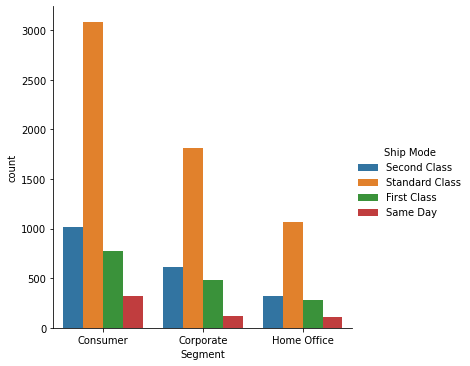

In [ ]:
sns.factorplot('Segment',data=df,hue='Ship Mode',kind='count')

among the three Segment, most use standard class Ship Mode

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


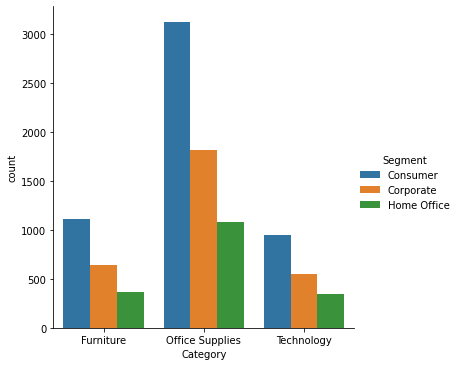

In [ ]:
sns.factorplot('Category',data=df,hue='Segment',kind='count')

number of shipments with different segments is Catogory office supplies

In [ ]:
df.groupby('Category')['Quantity'].sum()

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

In [ ]:
df.groupby(['Category','Sub-Category'])['Quantity'].sum()

Category         Sub-Category
Furniture        Bookcases        868
                 Chairs          2356
                 Furnishings     3563
                 Tables          1241
Office Supplies  Appliances      1729
                 Art             3000
                 Binders         5974
                 Envelopes        906
                 Fasteners        914
                 Labels          1400
                 Paper           5178
                 Storage         3158
                 Supplies         647
Technology       Accessories     2976
                 Copiers          234
                 Machines         440
                 Phones          3289
Name: Quantity, dtype: int64

From Furniture the most item Quantity is Furnishings, Office Supplies is Binders, and Technology is phones

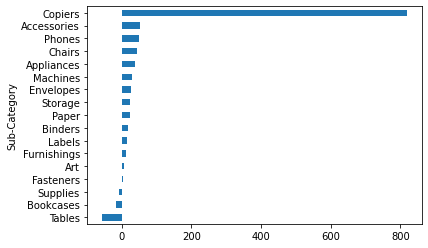

In [ ]:
prof = df.groupby('Sub-Category')['Profit'].mean().sort_values()
prof.plot(kind='barh')

the average of the subcategory with high profit is copiers and the lowest is tables

In [ ]:
copiers = dataset[dataset["Sub-Category"] == 'Copiers']

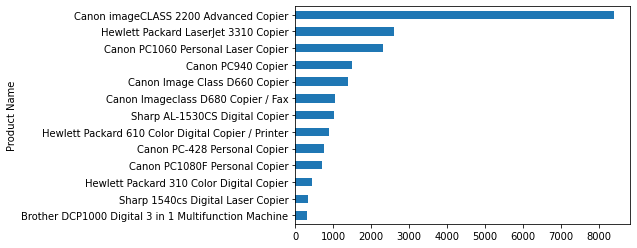

In [ ]:
copiers.groupby('Product Name')['Profit'].max().sort_values().plot(kind='barh')

i think we can say the highest profit product is Canon ImageClass 2200 Advanced Copier

In [ ]:
df1 = dataset.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Product Name'], axis = 1)

In [ ]:
df1.head()

,Order Date,Ship Date,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/16,11/11/16,Second Class,Consumer,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/8/16,11/11/16,Second Class,Consumer,Furniture,Chairs,731.9400,3,0.00,219.5820
2,6/12/16,6/16/16,Second Class,Corporate,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,10/11/15,10/18/15,Standard Class,Consumer,Furniture,Tables,957.5775,5,0.45,-383.0310
4,10/11/15,10/18/15,Standard Class,Consumer,Office Supplies,Storage,22.3680,2,0.20,2.5164


Get the delay value from order to shiping

In [ ]:
import datetime as dt
orderDate = pd.to_datetime(df1['Order Date'])
shipDate = pd.to_datetime(df1['Ship Date'])

In [ ]:
dis_Day = shipDate - orderDate
dis_Day = dis_Day.apply(lambda x: int(str(x)[0]))

In [ ]:
df1['Distance Day'] = dis_Day

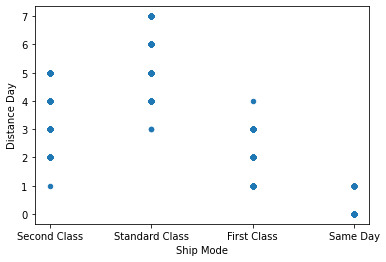

In [ ]:
df1.plot.scatter(x="Ship Mode",y='Distance Day')
plt.show()

delivery day per mode:
* Same Day : 0-1 days
* First Class : 1-4 days
* Second Class : 1-5 days
* Standard Class : 3-7 days

# Conclusion

* among the three Segment, most use standard class Ship Mode (mybe because is the cheapest Shipping mode)
* the average of the subcategory with high profit is copiers and the lowest is tables
* highest profit product is Canon ImageClass 2200 Advanced Copier
* the longest shipping mode is Standard Class is 3-7 days